In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import simtk.openmm as mm
from torsionfit.database import qmdatabase as ScanSet
import torsionfit.model as Model
from torsionfit.backends import sqlite_plus
from pymc import MCMC
from parmed.charmm import CharmmParameterSet
from torsionfit import plots
from matplotlib.backends.backend_pdf import PdfPages
import torsionfit.parameters as par
from collections import OrderedDict
import numpy as np
from pymbar.timeseries import detectEquilibration
import tqdm

In [7]:
# load all dbs
dbs = {}
tau = ['0.001', '0.01', '0.1', '1.0', '10', '100', '1000', '10000', 'nuisance', 'nuisance_10000']
for t in tau:
    dbs[t] = OrderedDict()
    for i in range(0, 40):
        dbs[t]['db_{}'.format(i)] = sqlite_plus.load('tau_{}/tau_{}_{}/tau_{}_{}.sqlite'.format(t, t, i, t, i))

In [8]:
dev = np.zeros((40, 10000))

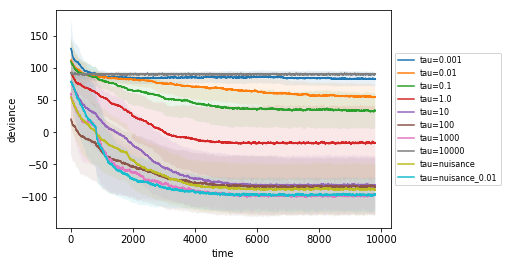

In [9]:
time = np.linspace(0, 9800, 9800)
for t in tau[:]:
    db_t = dbs[t]
    dev = np.zeros((40, 10000))
    for i, db in enumerate(db_t):
        dev[i] = db_t[db].deviance[:]
    average = np.average(dev, axis=0)
    std = dev.std(axis=0)
    average = average[200:]
    std = std[200:]
    plt.plot(average, label='tau={}'.format(t))
    plt.fill_between(time, average+std, average-std, alpha=0.1)
    lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('time')
plt.ylabel('deviance')
plt.savefig('deviance.pdf', bbox_to_anchor=(lgd,), bbox_inches='tight')


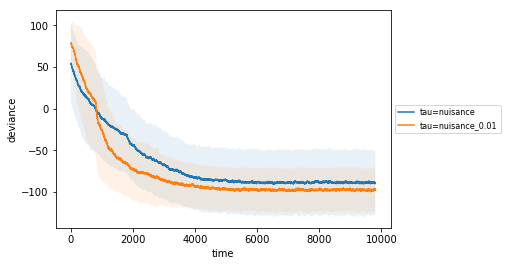

In [13]:
time = np.linspace(0, 9800, 9800)
for t in tau[8:]:
    db_t = dbs[t]
    dev = np.zeros((40, 10000))
    for i, db in enumerate(db_t):
        dev[i] = db_t[db].deviance[:]
    average = np.average(dev, axis=0)
    std = dev.std(axis=0)
    average = average[200:]
    std = std[200:]
    plt.plot(average, label='tau={}'.format(t))
    plt.fill_between(time, average+std, average-std, alpha=0.1)
    lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('time')
plt.ylabel('deviance')
plt.savefig('deviance_nuisance.pdf', bbox_to_anchor=(lgd,), bbox_inches='tight')


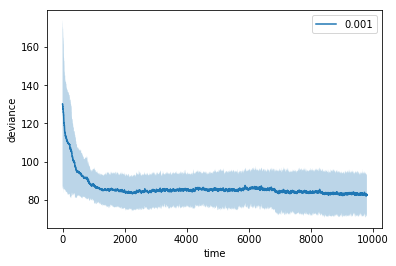

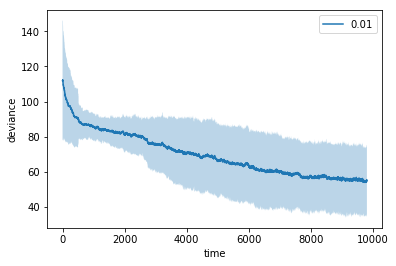

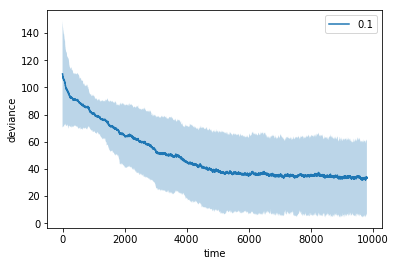

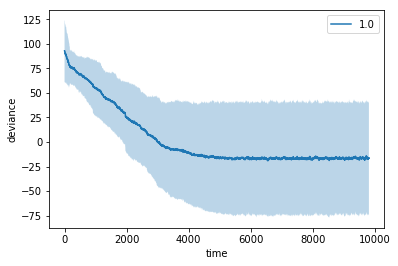

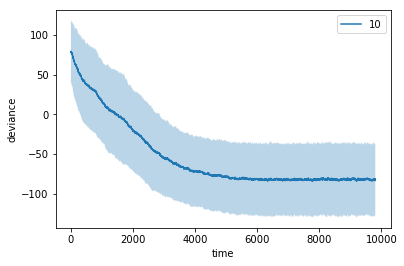

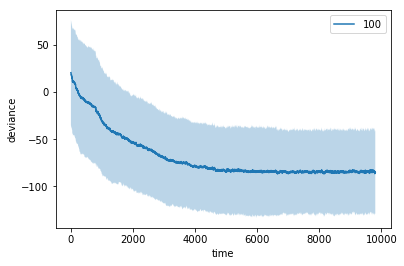

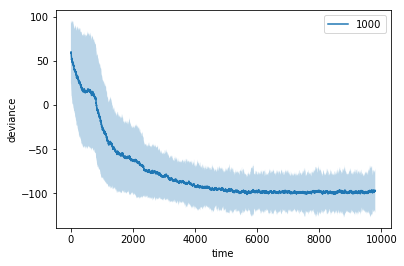

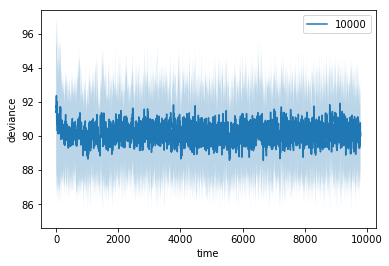

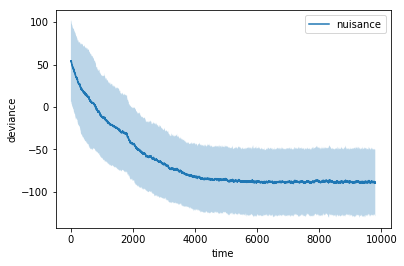

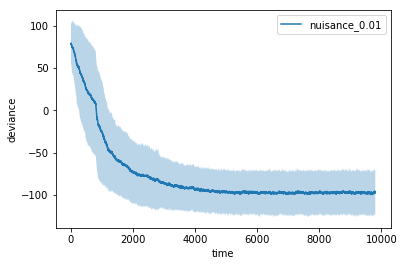

In [10]:
time = np.linspace(0, 9800, 9800)
with PdfPages('deviance_all.pdf') as pdf:
    for t in tau:
        plt.figure()
        db_t = dbs[t]
        dev = np.zeros((40, 10000))
        for i, db in enumerate(db_t):
            dev[i] = db_t[db].deviance[:]
        average = np.average(dev, axis=0)
        std = dev.std(axis=0)
        average = average[200:]
        std = std[200:]
        plt.plot(average, label=t)
        plt.fill_between(time, average+std, average-std, alpha=0.3)
        plt.legend()
        #lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))
        plt.xlabel('time')
        plt.ylabel('deviance')
        pdf.savefig()

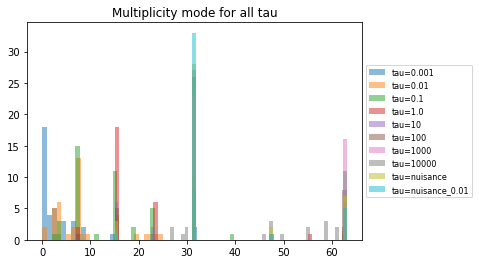

In [11]:
# Look at multiplicities for all tau
from scipy import stats
for t in tau:
    db_t = dbs[t]
    mode = np.zeros((len(db_t)))
    var = np.zeros((len(db_t)))
    for i, db in enumerate(db_t):
        mode[i] = stats.mode(db_t[db].CG331_CG321_CG321_CG331_multiplicity_bitstring[4000:])[0]
        var[i] = db_t[db].CG331_CG321_CG321_CG331_multiplicity_bitstring[4000:].var()
    plt.hist(mode, bins=int(mode.max()), alpha=0.5, label='tau={}'.format(t))
    lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Multiplicity mode for all tau')
    plt.savefig('multiplicity_mode_tau.pdf', bbox_to_anchor=(lgd,), bbox_inches='tight')

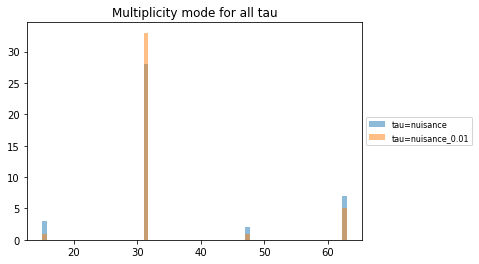

In [14]:
# Look at multiplicities for all tau
from scipy import stats
for t in tau[8:]:
    db_t = dbs[t]
    mode = np.zeros((len(db_t)))
    var = np.zeros((len(db_t)))
    for i, db in enumerate(db_t):
        mode[i] = stats.mode(db_t[db].CG331_CG321_CG321_CG331_multiplicity_bitstring[4000:])[0]
        var[i] = db_t[db].CG331_CG321_CG321_CG331_multiplicity_bitstring[4000:].var()
    plt.hist(mode, bins=int(mode.max()), alpha=0.5, label='tau={}'.format(t))
    lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Multiplicity mode for all tau')
    plt.savefig('multiplicity_mode_tau_nuisance.pdf', bbox_to_anchor=(lgd,), bbox_inches='tight')